# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"appid="+weather_api_key+"&q="+city+"&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json= city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]    
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | ostrovnoy
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | camopi
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | asfi
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | fomboni
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | vostok
Processing Record 16 of Set 1 | kavaratti
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | porto novo
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | karamea
City not found. Skipping...
Processing Record 22 of Set

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,37.76,84,100,0.00,US,1675826168
1,jamestown,42.0970,-79.2353,37.04,93,100,13.80,US,1675826085
2,ostrovnoy,68.0531,39.5131,30.56,77,9,22.59,RU,1675826170
3,new norfolk,-42.7826,147.0587,62.10,32,5,4.54,AU,1675826171
4,camopi,3.1655,-52.3158,71.65,99,100,1.79,GF,1675826173


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,37.76,84,100,0.00,US,1675826168
1,jamestown,42.0970,-79.2353,37.04,93,100,13.80,US,1675826085
2,ostrovnoy,68.0531,39.5131,30.56,77,9,22.59,RU,1675826170
3,new norfolk,-42.7826,147.0587,62.10,32,5,4.54,AU,1675826171
4,camopi,3.1655,-52.3158,71.65,99,100,1.79,GF,1675826173


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

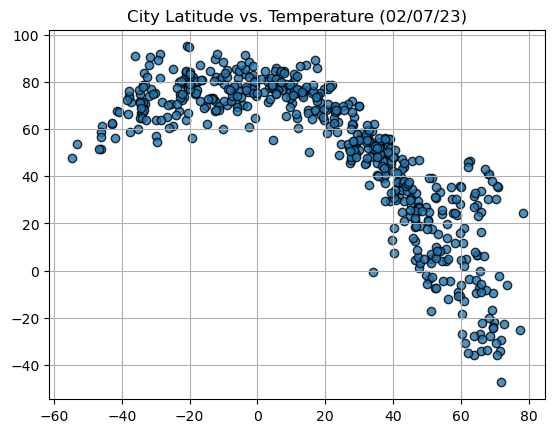

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

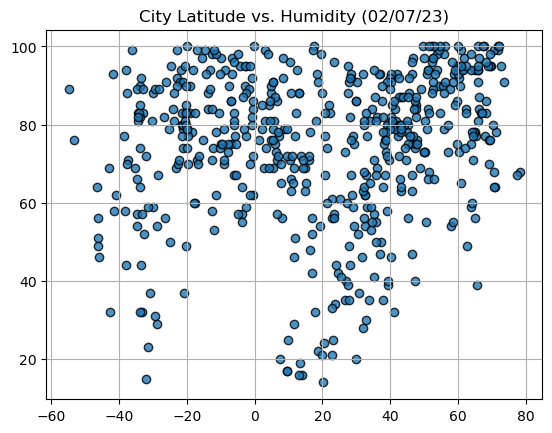

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

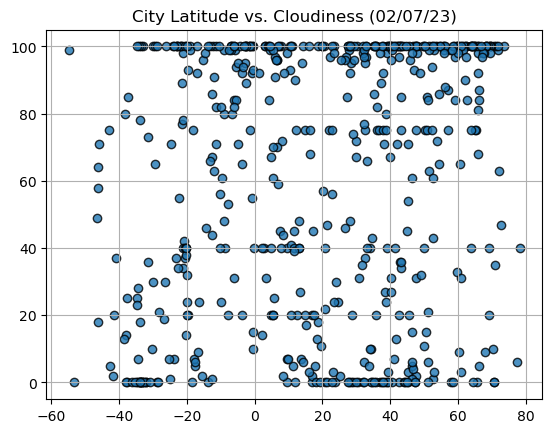

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

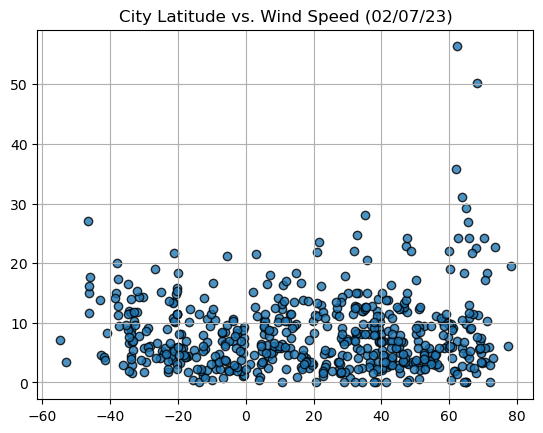

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-value is: {r_value**2}")
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,37.76,84,100,0.00,US,1675826168
1,jamestown,42.0970,-79.2353,37.04,93,100,13.80,US,1675826085
2,ostrovnoy,68.0531,39.5131,30.56,77,9,22.59,RU,1675826170
4,camopi,3.1655,-52.3158,71.65,99,100,1.79,GF,1675826173
8,ribeira grande,38.5167,-28.7000,54.77,67,27,5.01,PT,1675826112


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,new norfolk,-42.7826,147.0587,62.10,32,5,4.54,AU,1675826171
5,rikitea,-23.1203,-134.9692,79.84,69,37,9.04,PF,1675826021
6,hermanus,-34.4187,19.2345,66.79,83,0,11.92,ZA,1675826175
7,ushuaia,-54.8000,-68.3000,47.82,89,99,7.07,AR,1675825916
9,mataura,-46.1927,168.8643,51.48,51,64,11.68,NZ,1675826178


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7679207654415298


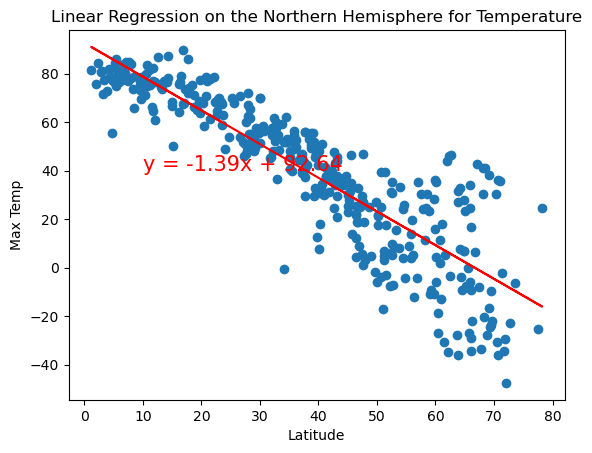

In [36]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Linear Regression on the Northern Hemisphere for Temperature', 'Max Temp',(10,40))


The r-value is: 0.19674682529172824


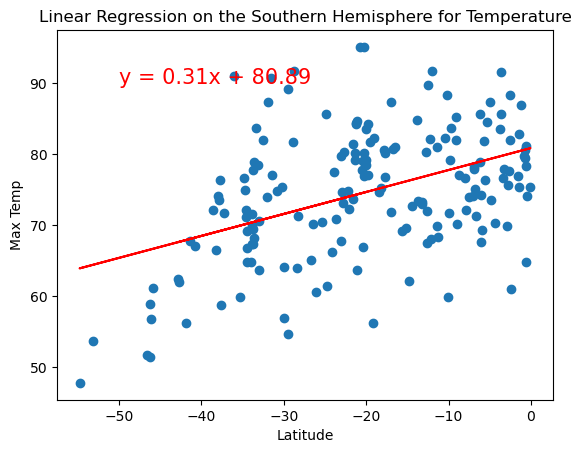

In [37]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Linear Regression on the Southern Hemisphere for Temperature', 'Max Temp',(-50,90))

**Discussion about the linear relationship:** As the latitude becomes closer to the equator, the temperatures become more stable and higher while temperatures drop and become more unpredictable as it goes to the poles.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11222165213171928


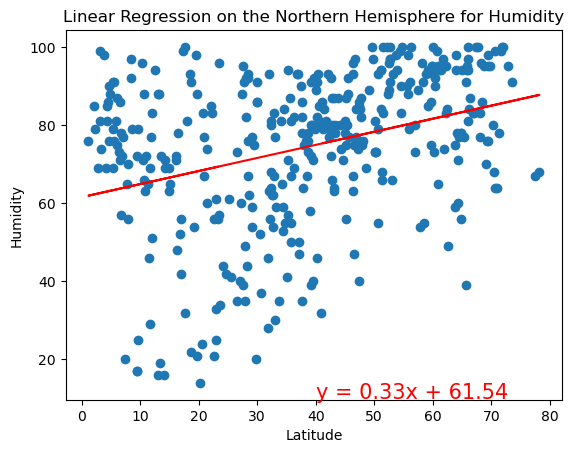

In [38]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'Linear Regression on the Northern Hemisphere for Humidity', 'Humidity',(40,10))

The r-value is: 0.10320865309059238


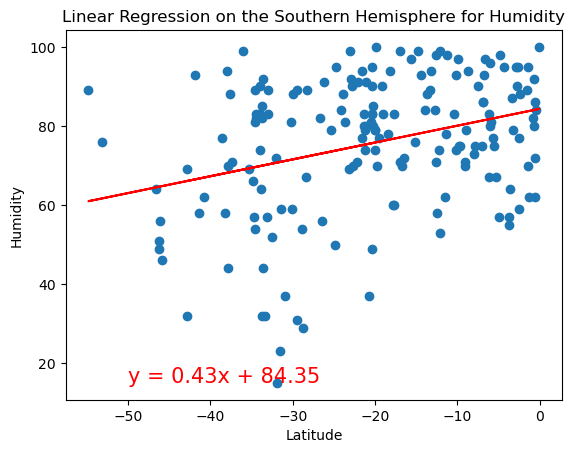

In [39]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'Linear Regression on the Southern Hemisphere for Humidity', 'Humidity',(-50,15))

**Discussion about the linear relationship:** Unlike temperatures, there is a smaller correlation btw humidity vs. latitude. However, we still see higher humidity(abeit a small increase) in the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.027835221471547964


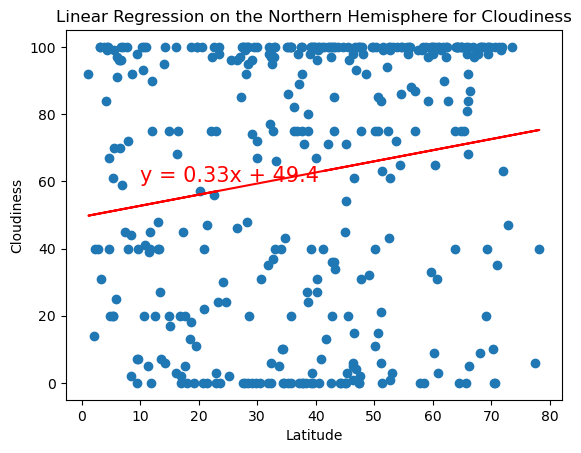

In [40]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Linear Regression on the Northern Hemisphere for Cloudiness', 'Cloudiness',(10,60))

The r-value is: 0.18883476156897794


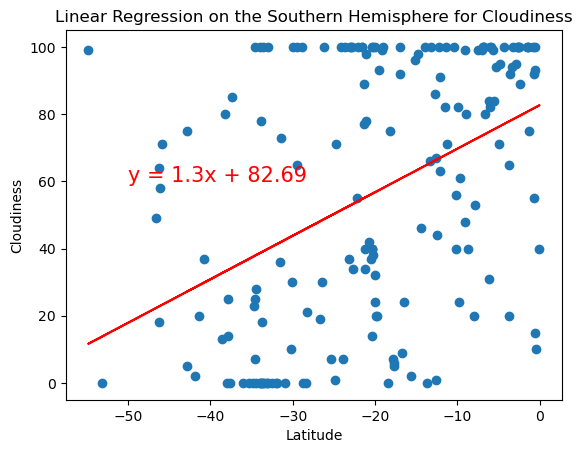

In [41]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'Linear Regression on the Southern Hemisphere for Cloudiness', 'Cloudiness',(-50,60))

**Discussion about the linear relationship:** Unlike temperature or humidity, the R-square value shows that their isn't much of a linear relationship between cloud cover and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00909959259654642


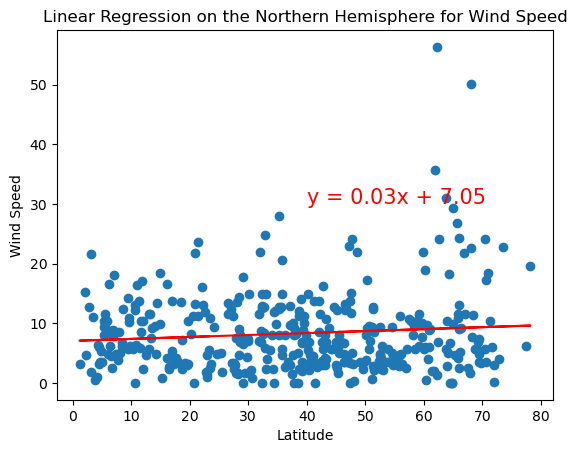

In [42]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,30))

The r-value is: 0.11623618815411343


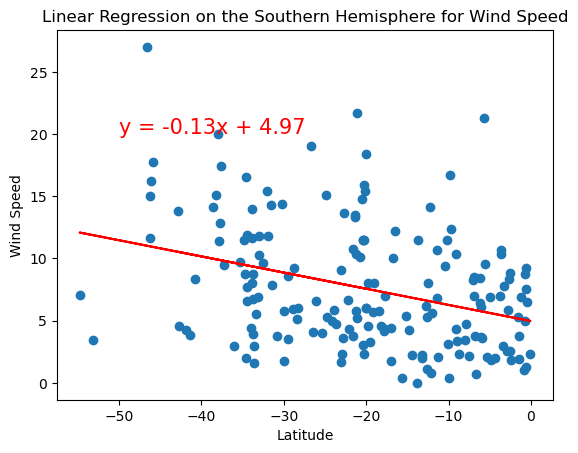

In [43]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))

**Discussion about the linear relationship:** Just like cloudiness, the small r-square value indicates there is no linear relationship between latitude and windspeed.